In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#PARAMETERS:

#Masses:
m1=5 ; m2=1 ; m3=2 ; m4=4 ; m5=6

#Spring constants:
c1=1 ; c2=5 ; c3=3 ; c4=4 ; c5=3

#----------------------------------------------------------------------------------------

#INITIAL CONDITIONS:

#Initial Conditions 1:
u11=0. ; u21=0. ; u31=0. ; u41=0. ; u51=1.
du11=0. ; du21=0. ; du31=0. ; du41=0. ; du51=0.

ic1m=[u11,u21,u31,u41,u51,du11,du21,du31,du41,du51]

#Initial Conditions 2:
u12=0. ; u22=0. ; u32=0. ; u42=0. ; u52=0.
du12=0. ; du22=1. ; du32=0. ; du42=0. ; du52=0.

ic2m=[u12,u22,u32,u42,u52,du12,du22,du32,du42,du52]

#Initial Conditions 3:
u13=0. ; u23=0. ; u33=0. ; u43=0. ; u53=1.
du13=0. ; du23=1. ; du33=0. ; du43=0. ; du53=0.
      
ic3m=[u13,u23,u33,u43,u53,du13,du23,du33,du43,du53]

In [3]:
def setAnchor(sol,steps):
    #anchor points below y=0
    anch = [2,4,6,8,10]
    #list to store modified solutions
    y_list = []
    
    #change solution anchorpoints
    for i in range(0,10):
        if(i<5):
            for j in range(0,steps):
                sol[i,j] = sol[i,j]-anch[i]
        y_list.append(sol[i])
    return y_list

In [4]:
def spring3D(a,b,pos):
    A = 1/50
    w = 5
    dt = b-a
    T = np.linspace(0,dt,100)
    
    X = A*np.cos(w/dt*2*np.pi*T)+pos
    Y = A*np.sin(w/dt*2*np.pi*T)
    Z = T
    
    return [X,Y,Z+a]

In [5]:
#Plot Displacement and Velocity vs. Time
def graph31(T,Y,tNum):
    #Title Bank
    titleList311 = ["Displacements of Undamped and Free System (Ini. Cond. 1)","Velocities of Undamped and Free System (Ini. Cond. 1)"]
    titleList312 = ["Displacements of Undamped and Free System (Ini. Cond. 2)","Velocities of Undamped and Free System (Ini. Cond. 2)"]
    titleList313 = ["Displacements of Undamped and Free System (Ini. Cond. 3)","Velocities of Undamped and Free System (Ini. Cond. 3)"]
    titles31 = [titleList311,titleList312,titleList313]
    
    #Displacement vs. Time
    for i in range(0,5):
        plt.rcParams['font.family'] = 'serif'
        plt.plot(T, Y[i], label = "u"+'{:01d}'.format(i+1))
       
    plt.title(titles31[tNum][0])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Displacement", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    #plt.savefig('Graphs/Graphs1/D{:01d}.pdf'.format(tNum+1)) << Uncomment to save graphs to a location
    plt.show()

    #Velocity vs. Time
    for i in range(5,10):
        plt.plot(T, Y[i], label = "v"+'{:01d}'.format(i-4))
        plt.rcParams['font.family'] = 'serif'
    plt.title(titles31[tNum][1])
    plt.xlabel("Time", size=11.5)
    plt.ylabel("Velocity", size=11.5)
    plt.grid()
    plt.legend(loc=1)
    #plt.savefig('Graphs/Graphs1/V{:01d}.pdf'.format(tNum+1)) << Uncomment to save graphs to a location
    plt.show()

In [6]:
#3.1 UNDAMPED & FREE
#The Parameter Matrix P
m31 = [[0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],
       [0,0,0,0,0,0,0,1,0,0],
       [0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1],
       [(-c1-c2)/m1,(c2)/m1,0,0,0,0,0,0,0,0],
       [(c2)/m2,(-c2-c3)/m2,(c3)/m2,0,0,0,0,0,0,0],
       [0,(c3)/m3,(-c3-c4)/m3,(c4)/m3,0,0,0,0,0,0],
       [0,0,(c4)/m4,(-c4-c5)/m4,(c5)/m4,0,0,0,0,0],
       [0,0,0,(c5)/m5,(-c5)/m5,0,0,0,0,0]]

In [7]:
#3.1 Set up Linspace and Time Interval
steps = 1000
t = np.linspace(0.0, 60.0, steps)
ts = (0,60)

In [8]:
#3.1 System of Differential Equations
def DE31(t,y):
    return np.matmul(m31,y)

In [9]:
#Numerical Solutions for Initial Conditions 1,2 and 3
sol45y311 = solve_ivp(DE31, ts, ic1m, t_eval=t, method='RK45')
sol45y312 = solve_ivp(DE31, ts, ic2m, t_eval=t, method='RK45')
sol45y313 = solve_ivp(DE31, ts, ic3m, t_eval=t, method='RK45')

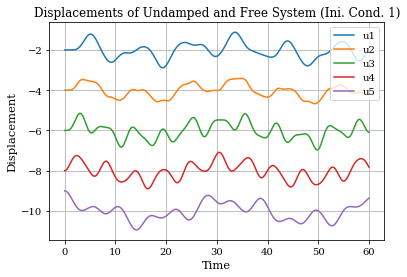

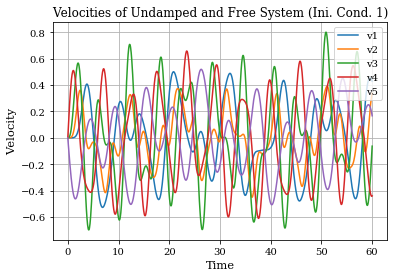

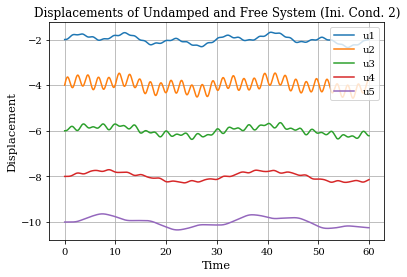

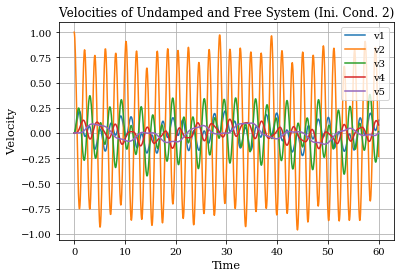

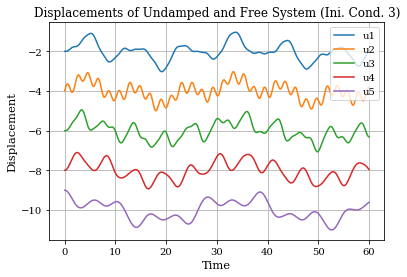

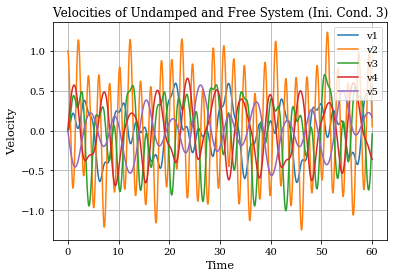

In [10]:
#3.1 Undamped and Free System Graphs
sol311 = setAnchor(sol45y311.y,steps)
sol312 = setAnchor(sol45y312.y,steps)
sol313 = setAnchor(sol45y313.y,steps)

#Graphs
graph31(t,sol311,0) #INITIAL CONDITION 1
graph31(t,sol312,1) #INITIAL CONDITION 2
graph31(t,sol313,2) #INITIAL CONDITION 3

<IPython.core.display.Javascript object>


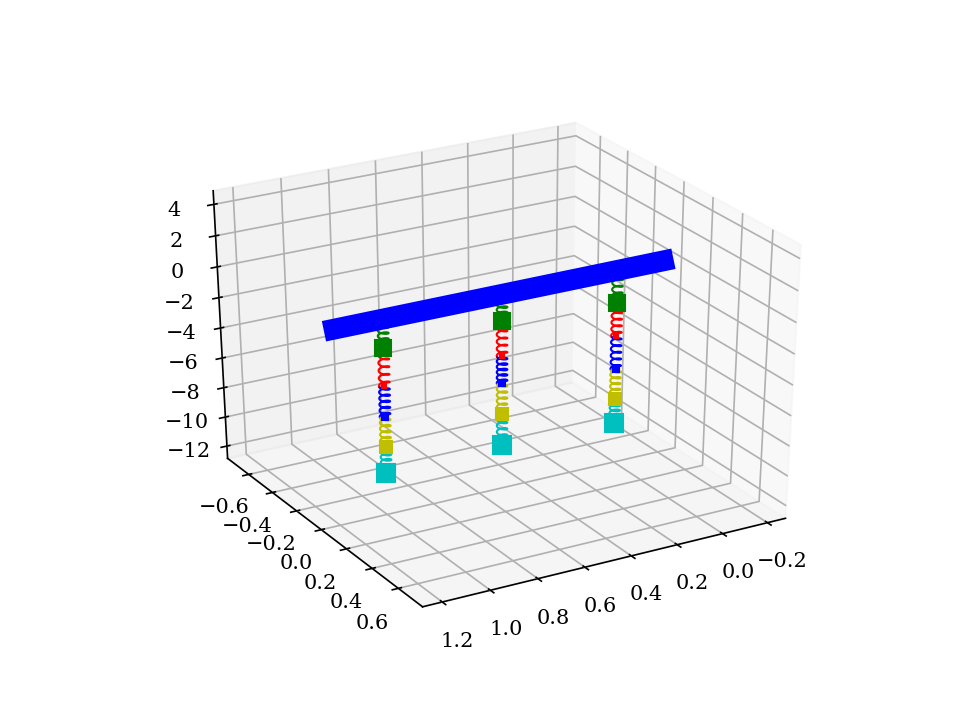

In [13]:
#3.1 Animation for Undamped and Free System     
%matplotlib notebook
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-0.25, 1.25), ylim=(-0.75, 0.75), zlim=(-12.5, 4.5))
ax.view_init(30, 60)
ax.grid()

#dt = 60/1000

#Plot Elements

#INITIAL CONDITION 1
spring1, = ax.plot([], [], [], 'g-', lw=1)
spring2, = ax.plot([], [], [], 'r-', lw=1)
spring3, = ax.plot([], [], [], 'b-', lw=1)
spring4, = ax.plot([], [], [], 'y-', lw=1)
spring5, = ax.plot([], [], [], 'c-', lw=1)
mass1, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass2, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass3, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass4, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass5, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

#INITIAL CONDITION 2
spring6, = ax.plot([], [], [], 'g-', lw=1)
spring7, = ax.plot([], [], [], 'r-', lw=1)
spring8, = ax.plot([], [], [], 'b-', lw=1)
spring9, = ax.plot([], [], [], 'y-', lw=1)
spring10, = ax.plot([], [], [], 'c-', lw=1)
mass6, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass7, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass8, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass9, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass10, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

#INITIAL CONDITION 3
spring11, = ax.plot([], [], [], 'g-', lw=1)
spring12, = ax.plot([], [], [], 'r-', lw=1)
spring13, = ax.plot([], [], [], 'b-', lw=1)
spring14, = ax.plot([], [], [], 'y-', lw=1)
spring15, = ax.plot([], [], [], 'c-', lw=1)
mass11, = ax.plot([], [], [], 'gs', markersize = 1.5*m1)
mass12, = ax.plot([], [], [], 'rs', markersize = 1.5*m2)
mass13, = ax.plot([], [], [], 'bs', markersize = 1.5*m3)
mass14, = ax.plot([], [], [], 'ys', markersize = 1.5*m4)
mass15, = ax.plot([], [], [], 'cs', markersize = 1.5*m5)

bar, = ax.plot([], [], [], 'b-', lw=10)
#TEXT

def animate(i):
    
    bar.set_data([-0.2,1.2],[0.0,0.0])
    bar.set_3d_properties([0.0,0.0])
    
    #Initial Condition 1 pos=0.0
    xpos1 = 0.0
    
    x1,y1,z1 = spring3D(0.0,sol311[0][i],xpos1)
    spring1.set_data(x1,y1)
    spring1.set_3d_properties(z1)
    
    x2,y2,z2 = spring3D(sol311[0][i],sol311[1][i],xpos1)
    spring2.set_data(x2,y2)
    spring2.set_3d_properties(z2)
    
    x3,y3,z3 = spring3D(sol311[1][i],sol311[2][i],xpos1)
    spring3.set_data(x3,y3)
    spring3.set_3d_properties(z3)
    
    x4,y4,z4 = spring3D(sol311[2][i],sol311[3][i],xpos1)
    spring4.set_data(x4,y4)
    spring4.set_3d_properties(z4)
    
    x5,y5,z5 = spring3D(sol311[3][i],sol311[4][i],xpos1)
    spring5.set_data(x5,y5)
    spring5.set_3d_properties(z5)
    
    mass1.set_data(xpos1,0.0)
    mass1.set_3d_properties(sol311[0][i])
    
    mass2.set_data(xpos1,0.0)
    mass2.set_3d_properties(sol311[1][i])
    
    mass3.set_data(xpos1,0.0)
    mass3.set_3d_properties(sol311[2][i])
    
    mass4.set_data(xpos1,0.0)
    mass4.set_3d_properties(sol311[3][i])
    
    mass5.set_data(xpos1,0.0)
    mass5.set_3d_properties(sol311[4][i])
    
    #Initial Condition 2 pos=0.5
    xpos2 = 0.5
    
    x6,y6,z6 = spring3D(0.0,sol312[0][i],xpos2)
    spring6.set_data(x6,y6)
    spring6.set_3d_properties(z6)
    
    x7,y7,z7 = spring3D(sol312[0][i],sol312[1][i],xpos2)
    spring7.set_data(x7,y7)
    spring7.set_3d_properties(z7)
    
    x8,y8,z8 = spring3D(sol312[1][i],sol312[2][i],xpos2)
    spring8.set_data(x8,y8)
    spring8.set_3d_properties(z8)
    
    x9,y9,z9 = spring3D(sol312[2][i],sol312[3][i],xpos2)
    spring9.set_data(x9,y9)
    spring9.set_3d_properties(z9)
    
    x10,y10,z10 = spring3D(sol312[3][i],sol312[4][i],xpos2)
    spring10.set_data(x10,y10)
    spring10.set_3d_properties(z10)
    
    mass6.set_data(xpos2,0.0)
    mass6.set_3d_properties(sol312[0][i])
    
    mass7.set_data(xpos2,0.0)
    mass7.set_3d_properties(sol312[1][i])
    
    mass8.set_data(xpos2,0.0)
    mass8.set_3d_properties(sol312[2][i])
    
    mass9.set_data(xpos2,0.0)
    mass9.set_3d_properties(sol312[3][i])
    
    mass10.set_data(xpos2,0.0)
    mass10.set_3d_properties(sol312[4][i])
    
    #Initial Condition 1 pos=1.0
    xpos3 = 1.0
    
    x11,y11,z11 = spring3D(0.0,sol313[0][i],xpos3)
    spring11.set_data(x11,y11)
    spring11.set_3d_properties(z11)
    
    x12,y12,z12 = spring3D(sol313[0][i],sol313[1][i],xpos3)
    spring12.set_data(x12,y12)
    spring12.set_3d_properties(z12)
    
    x13,y13,z13 = spring3D(sol313[1][i],sol313[2][i],xpos3)
    spring13.set_data(x13,y13)
    spring13.set_3d_properties(z13)
    
    x14,y14,z14 = spring3D(sol313[2][i],sol313[3][i],xpos3)
    spring14.set_data(x14,y14)
    spring14.set_3d_properties(z14)
    
    x15,y15,z15 = spring3D(sol313[3][i],sol313[4][i],xpos3)
    spring15.set_data(x15,y15)
    spring15.set_3d_properties(z15)
    
    mass11.set_data(xpos3,0.0)
    mass11.set_3d_properties(sol313[0][i])
    
    mass12.set_data(xpos3,0.0)
    mass12.set_3d_properties(sol313[1][i])
    
    mass13.set_data(xpos3,0.0)
    mass13.set_3d_properties(sol313[2][i])
    
    mass14.set_data(xpos3,0.0)
    mass14.set_3d_properties(sol313[3][i])
    
    mass15.set_data(xpos3,0.0)
    mass15.set_3d_properties(sol313[4][i])
    
    return spring1, spring2, spring3, spring4, spring5, spring6, spring7, spring8, spring9, spring10, spring11, spring12, spring13, spring14, spring15, mass1, mass2, mass3, mass4, mass5, mass6, mass7, mass8, mass9, mass10, mass11, mass12, mass13, mass14, mass15, bar
ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                             interval=20, blit=True)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)
ani.save('../Animations-3D/3DSpring1.mp4', writer=writer, dpi=400)